In [16]:
import json, pickle
import numpy as np
from collections import defaultdict
from itertools import groupby
import matplotlib.pyplot as plt
from metric import evaluate, ndcg, average_precision, precision
from utils import WordVector, load_judge_file

## ranking judgment

In [3]:
def rank_judge(json_filename, judgement_filename, file_format='text', reverse=False):
    rel_level = 2
    def relevance_mapper(r):
        if r < 0:
          return 0
        if r >= rel_level:
          return rel_level - 1
        return r
    test_qd_judge = load_judge_file(judgement_filename, file_format=file_format, reverse=reverse)
    for q in test_qd_judge:
        for d in test_qd_judge[q]:
          test_qd_judge[q][d] = relevance_mapper(test_qd_judge[q][d])
    ranks = json.load(open(json_filename, 'r'))
    def dedup(q, docs):
        ndocs = []
        docs_set = set()
        for d in docs:
            if d not in docs_set:
                ndocs.append(d)
                docs_set.add(d)
        return ndocs
    ranks = dict((q, dedup(q, ranks[q])) for q in ranks)
    print('avg #docs per query: {}'.format(np.mean([len(ranks[q]) for q in ranks])))
    for metric, top_k in [('precision', 1), ('precision', 5), ('precision', 10), 
                          ('average_precision', 1), ('average_precision', 5), ('average_precision', 10), ('average_precision', 1000)]:
        scores = evaluate(ranks, test_qd_judge, metric=eval(metric), top_k=top_k)
        avg_score = np.mean(list(scores.values()))
        print('{} {}: {}'.format(metric, top_k, avg_score))

In [4]:
print('matchpyramid')
rank_judge('ranking/matchpyramid/ranking.30.json', 'data/apple_small/test.prep.pointwise', 'text', False)

matchpyramid
avg #docs per query: 366.8448275862069
precision 1: 0.0603448275862069
precision 5: 0.034482758620689655
precision 10: 0.027586206896551727
average_precision 1: 0.0603448275862069
average_precision 5: 0.08994252873563219
average_precision 10: 0.0990353037766831
average_precision 1000: 0.07631416566679959


In [206]:
for slope in [13/12, 11/10, 9/8, 7/6, 5/4]:
    print('slope: {}'.format(slope))
    rank_judge('../MatchZoo/experiment/apple_small/ranking/tfidf_ratio8_pivote_slope{}.json'.format(slope),  
               'data/apple_small/test.prep.pointwise', 'text', False)

slope: 1.0833333333333333
avg #docs per query: 366.8448275862069
precision 1: 0.6810344827586207
precision 5: 0.2931034482758622
precision 10: 0.17155172413793107
average_precision 1: 0.6810344827586207
average_precision 5: 0.726772030651341
average_precision 10: 0.7184550199390101
average_precision 1000: 0.6780734041337186
slope: 1.1
avg #docs per query: 366.8448275862069
precision 1: 0.6896551724137931
precision 5: 0.2931034482758622
precision 10: 0.17241379310344834
average_precision 1: 0.6896551724137931
average_precision 5: 0.7306513409961686
average_precision 10: 0.7231006138087418
average_precision 1000: 0.6824602850142999
slope: 1.125
avg #docs per query: 366.8448275862069
precision 1: 0.6982758620689655
precision 5: 0.2896551724137932
precision 10: 0.17241379310344834
average_precision 1: 0.6982758620689655
average_precision 5: 0.7347102490421457
average_precision 10: 0.7247734381108766
average_precision 1000: 0.6843390231628806
slope: 1.1666666666666667
avg #docs per query: 3

In [205]:
for ratio in [0,1,2,4,8,16,32,-1]:
    print('ratio: {}'.format(ratio))
    rank_judge('../MatchZoo/experiment/apple_small/ranking/tfidf_ratio{}.json'.format(ratio), 
               'data/apple_small/test.prep.pointwise', 'text', False)

ratio: 0
avg #docs per query: 366.8448275862069
precision 1: 0.6724137931034483
precision 5: 0.28448275862068967
precision 10: 0.16724137931034488
average_precision 1: 0.6724137931034483
average_precision 5: 0.7210009578544062
average_precision 10: 0.705832478106185
average_precision 1000: 0.662529179470733
ratio: 1
avg #docs per query: 366.8448275862069
precision 1: 0.6637931034482759
precision 5: 0.28448275862068967
precision 10: 0.17241379310344834
average_precision 1: 0.6637931034482759
average_precision 5: 0.717073754789272
average_precision 10: 0.69748973727422
average_precision 1000: 0.663164087591008
ratio: 2
avg #docs per query: 366.8448275862069
precision 1: 0.6637931034482759
precision 5: 0.2896551724137932
precision 10: 0.17327586206896559
average_precision 1: 0.6637931034482759
average_precision 5: 0.7181273946360153
average_precision 10: 0.7017301978262569
average_precision 1000: 0.6669193969515205
ratio: 4
avg #docs per query: 366.8448275862069
precision 1: 0.68103448275

In [5]:
print('tfidf: use log(tf) || use normalization || use df')
rank_judge('../MatchZoo/experiment/apple_small/ranking/tfidf.json', 'data/apple_small/test.prep.pointwise', 'text', False)

tfidf: use log(tf) || use normalization || use df
avg #docs per query: 366.8448275862069
precision 1: 0.6724137931034483
precision 5: 0.2827586206896551
precision 10: 0.17068965517241383
average_precision 1: 0.6724137931034483
average_precision 5: 0.7228687739463603
average_precision 10: 0.7004436918445539
average_precision 1000: 0.6665067706827957


In [6]:
print('tf: use log(tf) || use normalization')
rank_judge('../MatchZoo/experiment/apple_small/ranking/tf.json', 'data/apple_small/test.prep.pointwise', 'text', False)

tf: use log(tf) || use normalization
avg #docs per query: 366.8448275862069
precision 1: 0.5344827586206896
precision 5: 0.24482758620689657
precision 10: 0.1448275862068966
average_precision 1: 0.5344827586206896
average_precision 5: 0.5933908045977011
average_precision 10: 0.5826855842911877
average_precision 1000: 0.537250900144372


In [7]:
print('tf_nonorm: use log(tf)')
rank_judge('../MatchZoo/experiment/apple_small/ranking/tf_nonorm.json', 'data/apple_small/test.prep.pointwise', 'text', False)

tf_nonorm: use log(tf)
avg #docs per query: 366.8448275862069
precision 1: 0.14655172413793102
precision 5: 0.06724137931034484
precision 10: 0.05689655172413793
average_precision 1: 0.14655172413793102
average_precision 5: 0.18448275862068964
average_precision 10: 0.20461651614668858
average_precision 1000: 0.1755718233759357


In [8]:
print('tf: ')
rank_judge('../MatchZoo/experiment/apple_small/ranking/tf_nonorm_nosublinear.json', 'data/apple_small/test.prep.pointwise', 'text', False)

tf: 
avg #docs per query: 366.8448275862069
precision 1: 0.02586206896551724
precision 5: 0.022413793103448276
precision 10: 0.022413793103448276
average_precision 1: 0.02586206896551724
average_precision 5: 0.04454022988505747
average_precision 10: 0.05430692391899289
average_precision 1000: 0.05942179084335082


In [9]:
print('log tf: ')
rank_judge('ranking/log_tf/ranking.1.json', 'data/apple_small/test.prep.pointwise', 'text', False)

log tf: 
avg #docs per query: 366.8448275862069
precision 1: 0.3103448275862069
precision 5: 0.13103448275862067
precision 10: 0.07672413793103448
average_precision 1: 0.3103448275862069
average_precision 5: 0.34630028735632185
average_precision 10: 0.3433966201423098
average_precision 1000: 0.29068433086339085


## embedding visualization

In [13]:
def emb_vis(filepath):
    wv = WordVector(filepath=filepath, first_line=True)
    length = np.sqrt(np.sum(wv.vectors * wv.vectors, axis=1))
    plt.hist(length, bins=100)
    plt.show()

0.0


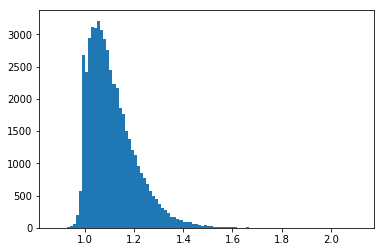

In [14]:
emb_vis('data/bing/w2v_update_all_330_pad_tfrecord')

0.0


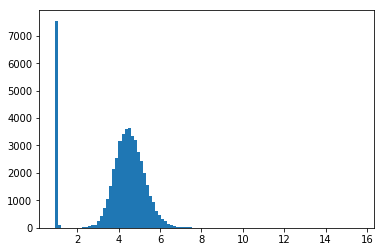

In [15]:
emb_vis('data/bing/w2v')

## density visualization

In [59]:
def density_vis(filepath):
    rel_density, nonrel_density = pickle.load(open(filepath, 'rb'))
    bins = np.linspace(-0.1, 1.5, 100)
    plt.hist(rel_density, bins, alpha=0.5, label='rel', density=True)
    plt.hist(nonrel_density, bins, alpha=0.5, label='nonrel', density=True)
    plt.legend(loc='upper right')
    plt.show()

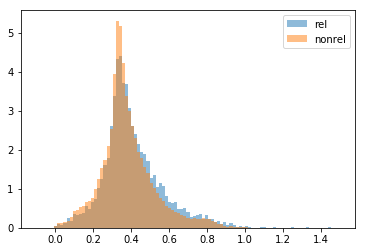

In [48]:
density_vis('density_test.data')

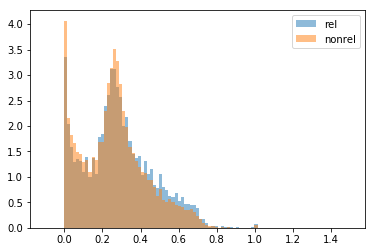

In [49]:
density_vis('density_test_05.data')

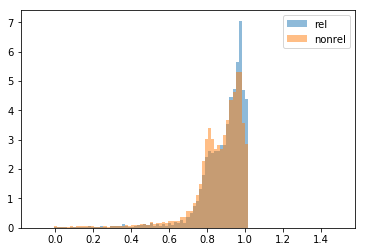

In [50]:
density_vis('density_test_01.data')

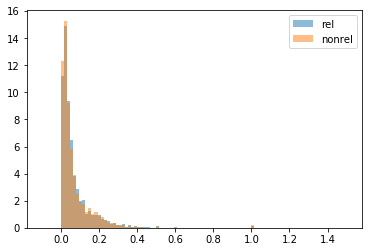

In [51]:
density_vis('density_test_relative_02.data')

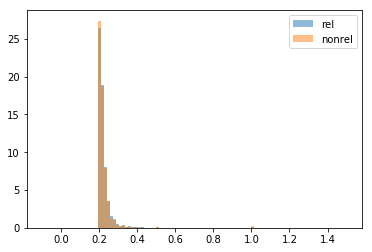

In [63]:
density_vis('density_test_percentile_02.data')

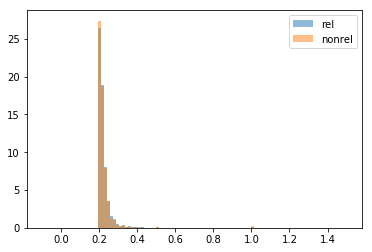

In [67]:
density_vis('density_test_tfpercentile_02.data')

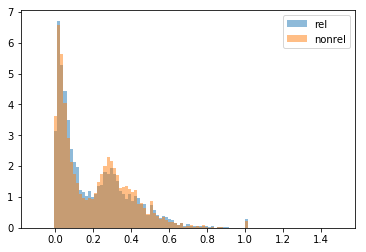

In [52]:
density_vis('density_test_relative_05.data')

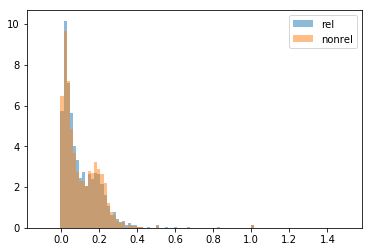

In [64]:
density_vis('density_test_relative_mean_05.data')

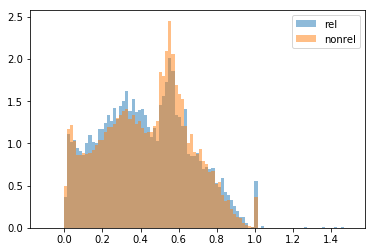

In [54]:
density_vis('density_test_relative_07.data')

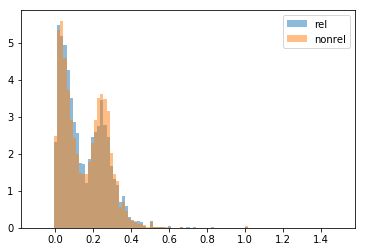

In [65]:
density_vis('density_test_relative_mean_07.data')

## match matrix focus

In [180]:
'''
margin is the margin used in pairwise training.
When the difference between score is bigger than margin,
there is no gradient/loss.
'''
def mmf_vis(filepath, margin=1, wrt='time', smooth_step=500, region_interval=[-0.5, -0.25, 0, 0.25, 0.5, 0.75, 100], top=None):
    focus, scores, regions = [], [], []
    with open(filepath, 'r') as fin:
        for i, l in enumerate(fin):
            if top and i > top:
                break
            ls = l.strip().split('\t')
            focus.append(float(ls[0]))
            scores.append(float(ls[1]))
            regions.append(list(map(lambda x: float(x), ls[2:])))
    if len(focus) % 2 != 0:
        focus = focus[:-1]
        scores = scores[:-1]
        regions = regions[:-1]
    focus, scores, regions = np.array(focus), np.array(scores), np.array(regions)
    focus = focus.reshape([-1, 2])
    scores = scores.reshape([-1, 2])
    regions = regions.reshape([-1, 2, regions.shape[-1]])
    x = scores[:, 0] - scores[:, 1]
    y1 = focus[:, 0]
    y2 = focus[:, 1]
    regions1 = regions[:, 0]
    regions2 = regions[:, 1]
    def filter_(y, x):
        filter_y = [y[i] for i,e in enumerate(x) if e<margin]
        return np.array(filter_y)
    def smooth(arr, n=smooth_step):
        arr_new = []
        for i in range(int(np.ceil(len(arr)/n))):
            arr_new.append(np.mean(arr[i*n:i*n+n]))
        return np.array(arr_new)
    print('before filter', len(y1), len(y2), len(regions1))
    y1 = filter_(y1, x)
    y2 = filter_(y2, x)
    regions1 = filter_(regions1, x)
    regions2 = filter_(regions2, x)
    x = filter_(x, x)
    print('after filter', len(y1), len(y2), len(regions1))
    print('is there any zero gradient? {}'.format(np.any(y1 == 0) or np.any(y1 == 0)))
    if wrt == 'time':
        y1 = smooth(y1)
        y2 = smooth(y2)
        plt.plot(y1, label='positive doc', color='red')
        plt.plot(y2, label='negative doc', color='blue')
        plt.legend()
    elif wrt == 'region':
        num_region = regions1.shape[-1]
        #fig, axes = plt.subplots(num_region, 1, figsize=(7, num_region * 3))
        #axes = axes.reshape([num_region, 1])
        plt.figure(figsize=(20,10))
        for r in range(num_region):
            #ax = axes[r, 0]
            r1 = regions1[:, r]
            r2 = regions2[:, r]
            r1 = smooth(r1)
            r2 = smooth(r2)
            if r > 0:
                label = '[{}, {}]'.format(region_interval[r-1], region_interval[r])
            else:
                label = '[{}, {}]'.format('-inf', region_interval[r])
            plt.plot((r1+r2)/2, label=label)
        plt.legend()
    elif wrt == 'margin':
        y1 = zip(x, y1)
        y1 = sorted(y1, key=lambda x: x[0]) 
        y1 = np.array([y[1] for y in y1])
        y1 = smooth(y1)
        y2 = zip(x, y2)
        y2 = sorted(y2, key=lambda x: x[0])
        y2 = np.array([y[1] for y in y2])
        y2 = smooth(y2)
        plt.plot(y1, label='positive doc', color='red')
        plt.plot(y2, label='negative doc', color='blue')
        #plt.scatter(x, y1, label='positive doc', color='red')
        #plt.scatter(x, y2, label='negative doc', color='blue')
    plt.show()

before filter 197844 197844 197844
after filter 110685 110685 110685
is there any zero gradient? False


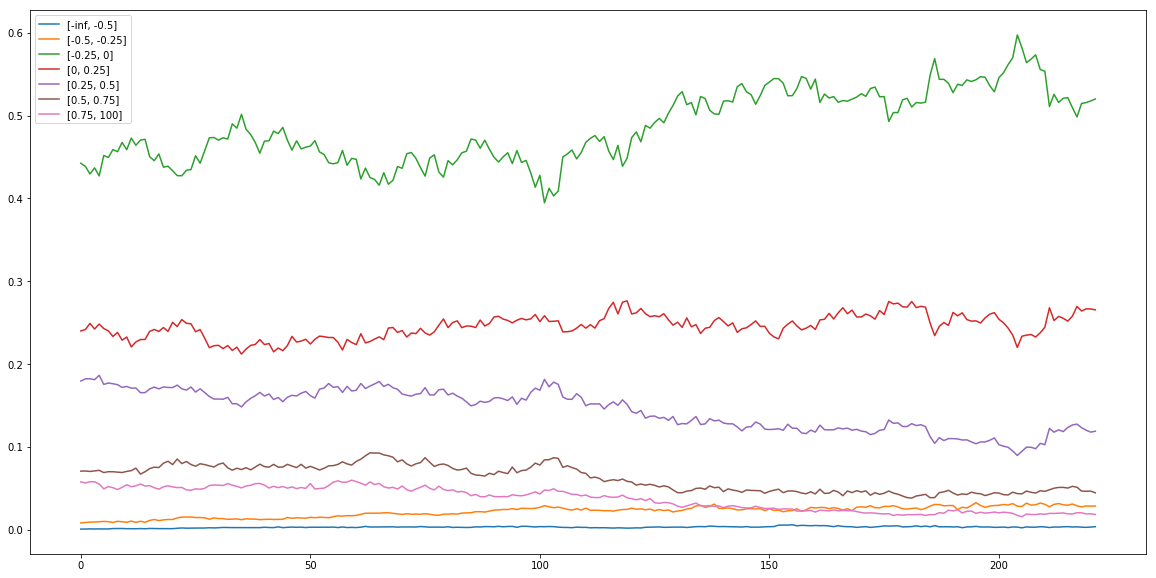

In [176]:
mmf_vis('match_matrix_focus_all_bins', wrt='region', smooth_step=500, region_interval=[-0.5, -0.25, 0, 0.25, 0.5, 0.75, 100])

before filter 50000 50000 50000
after filter 46730 46730 46730
is there any zero gradient? False


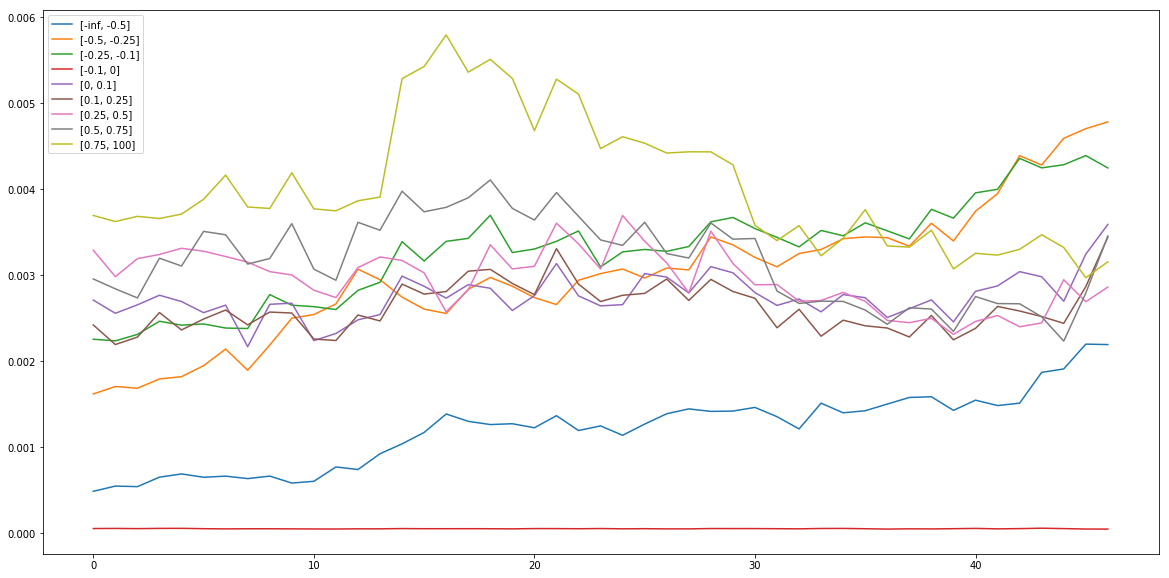

In [181]:
mmf_vis('match_matrix_focus_all_bins_mean_2', wrt='region', smooth_step=1000, 
        region_interval=[-0.5, -0.25, -0.1, 0, 0.1, 0.25, 0.5, 0.75, 100], top=100000)

before filter 167509 167509 167509
after filter 103917 103917 103917
is there any zero gradient? False


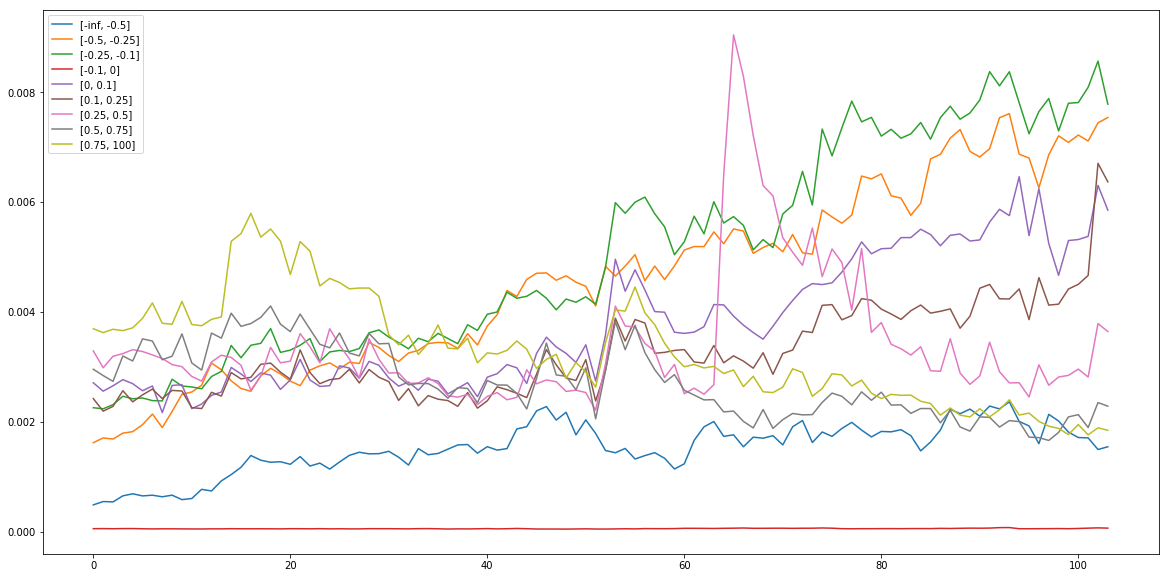

In [179]:
mmf_vis('match_matrix_focus_all_bins_mean_2', wrt='region', smooth_step=1000, 
        region_interval=[-0.5, -0.25, -0.1, 0, 0.1, 0.25, 0.5, 0.75, 100])

The "match_matrix_focus_all_bins_mean_no_overfit" file's training curve is:
```
EPO[1_0.3_0.0]	  train: 0.871	stop:1.000	offset:324.2	step:1.0	test_0.4:0.999:0.495:0.287
EPO[2_0.3_0.0]	  train: 0.788	stop:1.000	offset:305.0	step:1.0	test_0.3:0.999:0.492:0.291
EPO[3_0.3_0.0]	  train: 0.605	stop:1.000	offset:315.9	step:1.0	test_0.4:0.999:0.491:0.296
EPO[4_0.3_0.0]	  train: 0.498	stop:1.000	offset:339.8	step:1.0	test_0.3:0.998:0.491:0.307
EPO[5_0.3_0.0]	  train: 0.343	stop:1.000	offset:332.9	step:1.0	test_0.5:0.997:0.491:0.319
EPO[6_0.2_0.0]	  train: 0.296	stop:1.000	offset:379.6	step:1.0	test_0.3:0.999:0.490:0.321
EPO[7_0.2_0.0]	  train: 0.310	stop:1.000	offset:381.7	step:1.0	test_0.3:1.001:0.490:0.324
EPO[8_0.2_0.0]	  train: 0.264	stop:1.000	offset:336.9	step:1.0	test_0.3:1.005:0.490:0.327
EPO[9_0.2_0.0]	  train: 0.215	stop:1.000	offset:330.6	step:1.0	test_0.3:1.010:0.490:0.328
EPO[10_0.2_0.0]	  train: 0.189	stop:1.000	offset:297.9	step:1.0	test_0.5:1.015:0.490:0.329
```

before filter 132331 132331 132331
after filter 92204 92204 92204
is there any zero gradient? False


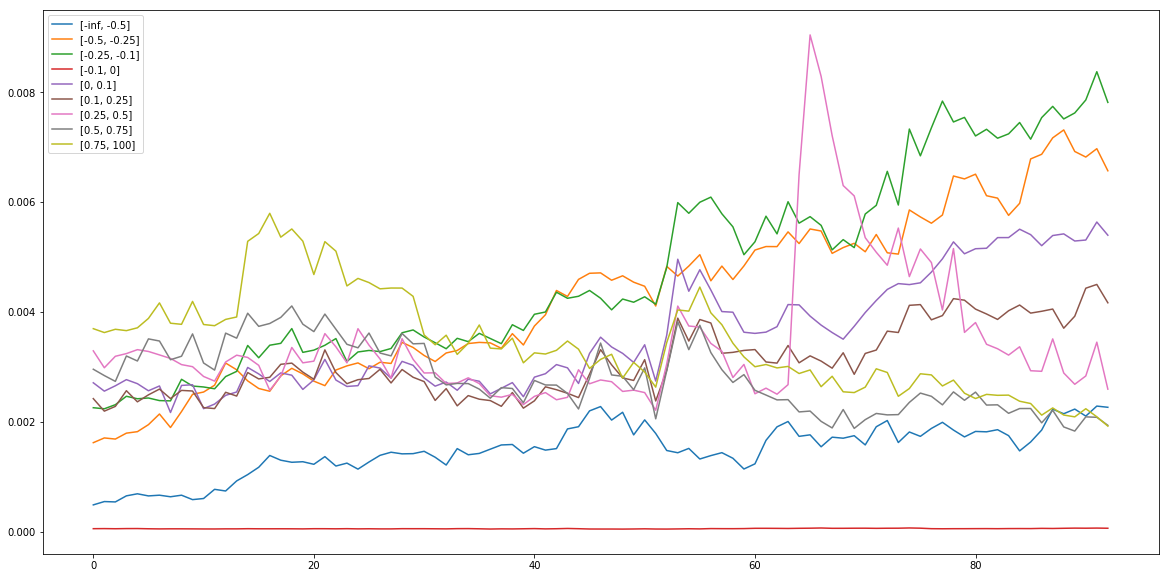

In [182]:
mmf_vis('match_matrix_focus_all_bins_mean_no_overfit', wrt='region', smooth_step=1000, 
        region_interval=[-0.5, -0.25, -0.1, 0, 0.1, 0.25, 0.5, 0.75, 100])

before filter 155476 155476 155476
after filter 99796 99796 99796
is there any zero gradient? False


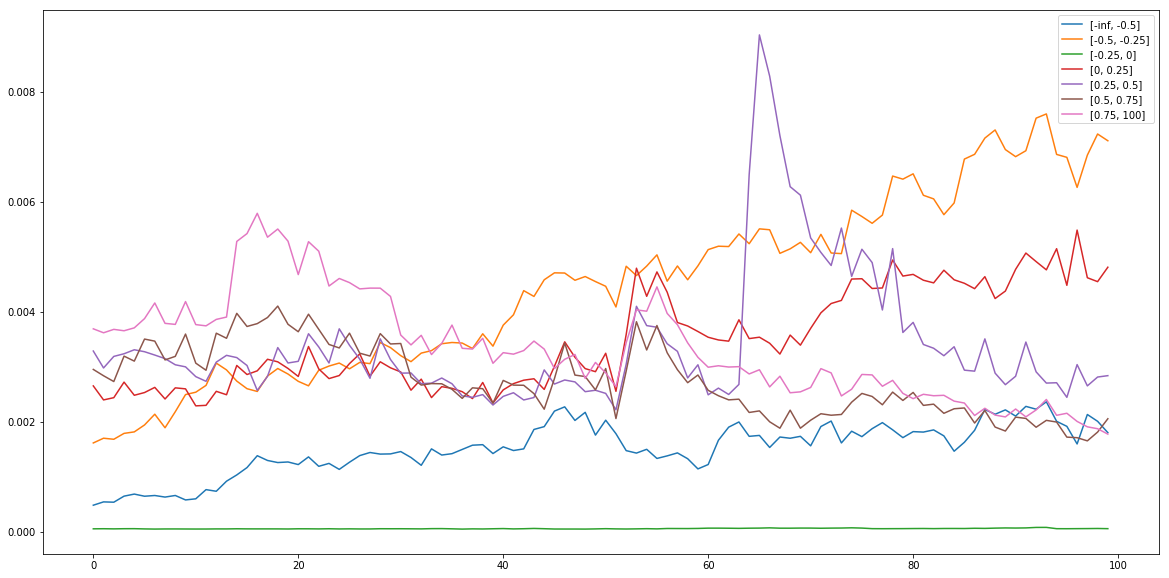

In [178]:
mmf_vis('match_matrix_focus_all_bins_mean', wrt='region', smooth_step=1000, region_interval=[-0.5, -0.25, 0, 0.25, 0.5, 0.75, 100])

filter 158200 158200
is there any zero gradient? False
smooth 100705 100705


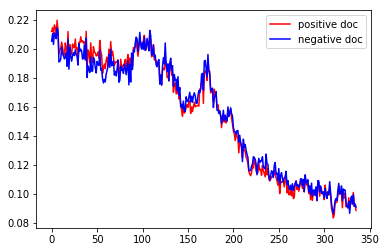

In [133]:
mmf_vis('match_matrix_focus', wrt='time', smooth_step=300)

filter 209176 209176
is there any zero gradient? False
smooth 206463 206463


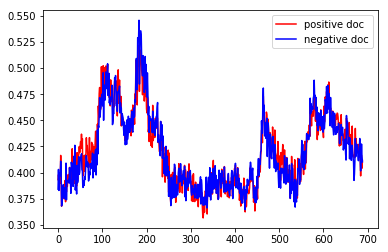

In [134]:
mmf_vis('match_matrix_focus_20_percent', wrt='time', smooth_step=300)

filter 158200 158200
is there any zero gradient? False


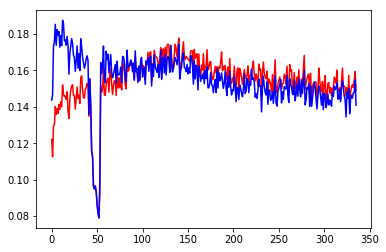

In [137]:
mmf_vis('match_matrix_focus', wrt='margin', smooth_step=300)

filter 209176 209176
is there any zero gradient? False


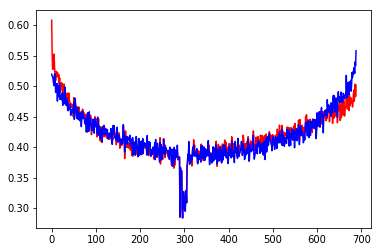

In [139]:
mmf_vis('match_matrix_focus_20_percent', wrt='margin', smooth_step=300)